In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.forecasting import theta
%matplotlib inline
import kagglehub

In [37]:
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/arpan/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [38]:
fat = pd.read_csv(f"{path}/bodyfat.csv")
fat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [39]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [40]:
# sns.pairplot(fat)

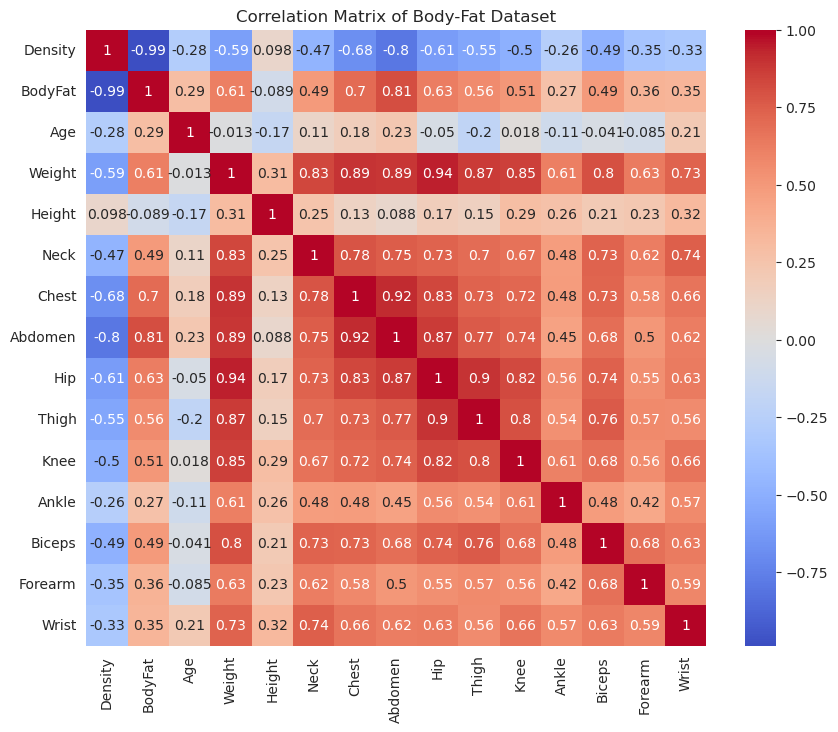

In [41]:
corr_matrix = fat.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Body-Fat Dataset')
plt.show()

In [42]:
y = fat['BodyFat']
X = fat.drop(columns = ['BodyFat'])
X

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [43]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

# Linear Regression

## Standardize the Dataset

In [44]:
def standardize(X):
    for i in X.columns:
        X[i] = (X[i] - X[i].mean())/X[i].std()
            
    return X

In [45]:
X = standardize(X)
X

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.800055,-1.736617,-0.839575,-0.654901,-0.737198,-0.916224,-0.682176,-0.754427,-0.077325,-0.535067,-0.709414,-0.090496,-0.625474,-1.210133
1,1.561952,-1.815970,-0.193078,0.573648,0.208949,-0.856916,-0.886199,-0.168168,-0.134468,-0.535067,0.175598,-0.586975,0.116847,-0.031879
2,-0.744758,-1.815970,-0.848082,-1.064418,-1.642207,-0.595958,-0.431783,-0.098375,0.036962,0.128337,0.529602,-1.149652,-1.714210,-1.745703
3,1.025997,-1.498561,0.198223,0.573648,-0.243556,0.115746,-0.570890,0.180797,0.132201,-0.535067,-0.178407,0.041899,0.364287,-0.031879
4,-1.133588,-1.657265,0.181210,0.300637,-1.477660,-0.418032,0.690345,0.278507,0.722682,1.496607,0.529602,-0.024299,-0.477010,-0.567449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.520098,-0.859660,-1.271976,-1.378832,-0.830556,-1.550066,-1.867818,-1.571635,-0.945417,-2.208808,-1.466770,0.289463
248,-1.680053,2.151642,0.751148,-0.108879,1.196232,0.910482,1.154035,0.641430,0.036962,0.916129,0.057596,0.968660,-0.031617,2.003287
249,-1.196642,2.151642,0.266275,-1.132671,0.373496,1.218887,1.756831,0.250590,0.170296,-0.535067,-0.945417,-0.322186,-0.724450,-0.246107
250,-0.823575,2.151642,0.402379,0.095879,0.373496,0.886758,0.810905,-0.293795,-0.648759,1.247831,-0.237408,-0.586975,0.364287,1.681945


## Gradient Descend

In [46]:
def gradient_descend(X, y, learning_rate = 0.01, n_iter = 10000):
    # X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]   # to calculate the bias term
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    
    for i in range(n_iter):
        h = X @ theta
        loss = (h - y)
        gradient = X.T @ loss / m
        theta = theta - (learning_rate * gradient)
    return theta

In [47]:
gradient_descend(X,y)

array([ 1.91507937e+01, -7.81807480e+00,  1.54440006e-01,  2.53780953e-01,
       -2.55069207e-02, -6.68153988e-02,  2.25706557e-01,  2.30017414e-01,
        1.42966820e-01, -8.73228876e-02, -6.77746437e-03, -1.42697395e-01,
       -1.62206131e-01,  6.96757956e-02,  7.90801427e-03])

# Define Fitness Function

Here we are using $\textbf{Akaike Information Criterion}$ which is given by the formula
    
$AIC = 2k - 2ln(\hat{L})$

where $k$ = number of estimated parameters 
      $\hat{L}$ = maximised value of likelihood function
 

In [48]:
def rss(X,y,theta):
    # X = normalize(X)
    X = np.c_[np.ones(X.shape[0]), X]
    residual_sum_squares = sum(((X @ theta) - y)**2)
    return residual_sum_squares

def calculate_aic(X,y,theta):
    n = len(y)
    aic = 2 * X.shape[1] + n * np.log(rss(X,y,theta) / n)
    return aic    

In [49]:
calculate_aic(X,y,gradient_descend(X,y))

134.71983969545624

# Generate Parent Population

In [50]:
def parent_pops(X,size,y):
    papa_pops = []
    # df_temp = data.drop(y, axis = 1)
    for i in range(size):
        feature_arrs = np.random.choice([True,False],size = X.shape[1])
        papa_pops.append(X.iloc[:, np.where(feature_arrs)[0]])
    return papa_pops


In [51]:
test_parents = parent_pops(X,10,y)
test_parents

[      Density      Neck     Chest       Hip     Ankle   Forearm
 0    0.800055 -0.737198 -0.916224 -0.754427 -0.709414 -0.625474
 1    1.561952  0.208949 -0.856916 -0.168168  0.175598  0.116847
 2   -0.744758 -1.642207 -0.595958 -0.098375  0.529602 -1.714210
 3    1.025997 -0.243556  0.115746  0.180797 -0.178407  0.364287
 4   -1.133588 -1.477660 -0.418032  0.278507  0.529602 -0.477010
 ..        ...       ...       ...       ...       ...       ...
 247  0.947180 -1.271976 -1.378832 -1.550066 -0.945417 -1.466770
 248 -1.680053  1.196232  0.910482  0.641430  0.057596 -0.031617
 249 -1.196642  0.373496  1.218887  0.250590 -0.945417 -0.724450
 250 -0.823575  0.373496  0.886758 -0.293795 -0.237408  0.364287
 251 -1.496146  1.155095  1.373089  1.004352  0.883607  0.661215
 
 [252 rows x 6 columns],
       Density       Age    Height     Chest       Hip     Wrist
 0    0.800055 -1.736617 -0.654901 -0.916224 -0.754427 -1.210133
 1    1.561952 -1.815970  0.573648 -0.856916 -0.168168 -0.03187

# Calculate Fitness of Parents

In [52]:
def parent_score(parents, y):
    pop_score = {}
    temp_var = 0
    for parent in parents:
        theta1 = gradient_descend(parent, y, learning_rate = 0.01, n_iter = 1000)
        aic = calculate_aic(parent, y, theta1)
        pop_score[temp_var] = aic
        temp_var += 1
    return pop_score

In [53]:
test_parent_score = parent_score(test_parents, y)
test_parent_score

{0: 130.39384956737513,
 1: 132.02675532331955,
 2: 870.1968544078372,
 3: 131.83356422145127,
 4: 937.9030014986444,
 5: 140.92472482802162,
 6: 136.52229051673385,
 7: 762.5197711841669,
 8: 131.75285583220997,
 9: 764.8284630972681}

# Select n Fittest Parents

In [54]:
def fittest_parents(population,lamda,y):

    parent_scores = parent_score(population,y)
    fittest_parent = []
    sorted_parents = sorted(parent_scores.items(), key = lambda x:x[1])
    top_lamda_parents_indices = sorted_parents[:lamda]
    top_lamda_parents = [item[0] for item in top_lamda_parents_indices]
    
    for i in top_lamda_parents:
        fittest_parent.append(population[i])
    return fittest_parent

In [55]:
fittest_parents(test_parents,5,y)

[      Density      Neck     Chest       Hip     Ankle   Forearm
 0    0.800055 -0.737198 -0.916224 -0.754427 -0.709414 -0.625474
 1    1.561952  0.208949 -0.856916 -0.168168  0.175598  0.116847
 2   -0.744758 -1.642207 -0.595958 -0.098375  0.529602 -1.714210
 3    1.025997 -0.243556  0.115746  0.180797 -0.178407  0.364287
 4   -1.133588 -1.477660 -0.418032  0.278507  0.529602 -0.477010
 ..        ...       ...       ...       ...       ...       ...
 247  0.947180 -1.271976 -1.378832 -1.550066 -0.945417 -1.466770
 248 -1.680053  1.196232  0.910482  0.641430  0.057596 -0.031617
 249 -1.196642  0.373496  1.218887  0.250590 -0.945417 -0.724450
 250 -0.823575  0.373496  0.886758 -0.293795 -0.237408  0.364287
 251 -1.496146  1.155095  1.373089  1.004352  0.883607  0.661215
 
 [252 rows x 6 columns],
       Density       Age    Weight    Height      Neck     Chest       Hip  \
 0    0.800055 -1.736617 -0.839575 -0.654901 -0.737198 -0.916224 -0.754427   
 1    1.561952 -1.815970 -0.193078  0

In [56]:
parent_score(fittest_parents(test_parents,5,y),y)

{0: 130.39384956737513,
 1: 131.75285583220997,
 2: 131.83356422145127,
 3: 132.02675532331955,
 4: 136.52229051673385}

In [57]:
test_new = []
test_new.extend(fittest_parents(test_parents,5,y)[:2])
test_new

[      Density      Neck     Chest       Hip     Ankle   Forearm
 0    0.800055 -0.737198 -0.916224 -0.754427 -0.709414 -0.625474
 1    1.561952  0.208949 -0.856916 -0.168168  0.175598  0.116847
 2   -0.744758 -1.642207 -0.595958 -0.098375  0.529602 -1.714210
 3    1.025997 -0.243556  0.115746  0.180797 -0.178407  0.364287
 4   -1.133588 -1.477660 -0.418032  0.278507  0.529602 -0.477010
 ..        ...       ...       ...       ...       ...       ...
 247  0.947180 -1.271976 -1.378832 -1.550066 -0.945417 -1.466770
 248 -1.680053  1.196232  0.910482  0.641430  0.057596 -0.031617
 249 -1.196642  0.373496  1.218887  0.250590 -0.945417 -0.724450
 250 -0.823575  0.373496  0.886758 -0.293795 -0.237408  0.364287
 251 -1.496146  1.155095  1.373089  1.004352  0.883607  0.661215
 
 [252 rows x 6 columns],
       Density       Age    Weight    Height      Neck     Chest       Hip  \
 0    0.800055 -1.736617 -0.839575 -0.654901 -0.737198 -0.916224 -0.754427   
 1    1.561952 -1.815970 -0.193078  0

# Uniform Crossover

In [58]:
def uniform_crossover(X,parent1, parent2):

    parent_list1 = parent1.columns.tolist()
    # temp = 0
    
    bool_arr1 = np.zeros(X.shape[1])
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if np.random.uniform() >= 0.5:
            temp = bool_arr1[i]
            bool_arr1[i] = bool_arr2[i]
            bool_arr2[i] = temp
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]
    return  new_parent1, new_parent2

In [59]:
test_parent1 = fittest_parents(test_parents,5,y)[0]
test_parent2 = fittest_parents(test_parents,5,y)[1]
test_parent1

,Density,Neck,Chest,Hip,Ankle,Forearm
0,0.800055,-0.737198,-0.916224,-0.754427,-0.709414,-0.625474
1,1.561952,0.208949,-0.856916,-0.168168,0.175598,0.116847
2,-0.744758,-1.642207,-0.595958,-0.098375,0.529602,-1.714210
3,1.025997,-0.243556,0.115746,0.180797,-0.178407,0.364287
4,-1.133588,-1.477660,-0.418032,0.278507,0.529602,-0.477010
...,...,...,...,...,...,...
247,0.947180,-1.271976,-1.378832,-1.550066,-0.945417,-1.466770
248,-1.680053,1.196232,0.910482,0.641430,0.057596,-0.031617
249,-1.196642,0.373496,1.218887,0.250590,-0.945417,-0.724450
250,-0.823575,0.373496,0.886758,-0.293795,-0.237408,0.364287


In [60]:
test_parent2

,Density,Age,Weight,Height,Neck,Chest,Hip,Knee
0,0.800055,-1.736617,-0.839575,-0.654901,-0.737198,-0.916224,-0.754427,-0.535067
1,1.561952,-1.815970,-0.193078,0.573648,0.208949,-0.856916,-0.168168,-0.535067
2,-0.744758,-1.815970,-0.848082,-1.064418,-1.642207,-0.595958,-0.098375,0.128337
3,1.025997,-1.498561,0.198223,0.573648,-0.243556,0.115746,0.180797,-0.535067
4,-1.133588,-1.657265,0.181210,0.300637,-1.477660,-0.418032,0.278507,1.496607
...,...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.520098,-0.859660,-1.271976,-1.378832,-1.550066,-1.571635
248,-1.680053,2.151642,0.751148,-0.108879,1.196232,0.910482,0.641430,0.916129
249,-1.196642,2.151642,0.266275,-1.132671,0.373496,1.218887,0.250590,-0.535067
250,-0.823575,2.151642,0.402379,0.095879,0.373496,0.886758,-0.293795,1.247831


In [61]:
test_offspring1,test_offspring2 = uniform_crossover(X,test_parent1,test_parent2)
test_offspring1

,Density,Age,Weight,Neck,Chest,Hip,Knee
0,0.800055,-1.736617,-0.839575,-0.737198,-0.916224,-0.754427,-0.535067
1,1.561952,-1.815970,-0.193078,0.208949,-0.856916,-0.168168,-0.535067
2,-0.744758,-1.815970,-0.848082,-1.642207,-0.595958,-0.098375,0.128337
3,1.025997,-1.498561,0.198223,-0.243556,0.115746,0.180797,-0.535067
4,-1.133588,-1.657265,0.181210,-1.477660,-0.418032,0.278507,1.496607
...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.520098,-1.271976,-1.378832,-1.550066,-1.571635
248,-1.680053,2.151642,0.751148,1.196232,0.910482,0.641430,0.916129
249,-1.196642,2.151642,0.266275,0.373496,1.218887,0.250590,-0.535067
250,-0.823575,2.151642,0.402379,0.373496,0.886758,-0.293795,1.247831


# Random Bit-Flip Mutation

In [62]:
def rbf_mutation(X,parent1, parent2,mutation_rate):
    # X = data.drop(target_variable, axis = 1)
    
    bool_arr1 = np.zeros(X.shape[1])
    parent_list1 = parent1.columns.tolist()
    for i in parent_list1:
        bool_arr1[X.columns.get_loc(i)] = 1
        
    bool_arr2 = np.zeros(X.shape[1])
    parent_list2 = parent2.columns.tolist()
    for i in parent_list2:
        bool_arr2[X.columns.get_loc(i)] = 1
        
    for i in range(len(bool_arr1)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr1[i] = 1-bool_arr1[i]
            continue
    for i in range(len(bool_arr2)):
        if mutation_rate > np.random.normal(loc = .5, scale = .25, size = 1):
            bool_arr2[i] = 1-bool_arr2[i]
            continue
            
    new_parent1 = X.iloc[:, np.where(bool_arr1)[0]]
    new_parent2 = X.iloc[:, np.where(bool_arr2)[0]]    
    
    return new_parent1, new_parent2

In [63]:
test_parent1

,Density,Neck,Chest,Hip,Ankle,Forearm
0,0.800055,-0.737198,-0.916224,-0.754427,-0.709414,-0.625474
1,1.561952,0.208949,-0.856916,-0.168168,0.175598,0.116847
2,-0.744758,-1.642207,-0.595958,-0.098375,0.529602,-1.714210
3,1.025997,-0.243556,0.115746,0.180797,-0.178407,0.364287
4,-1.133588,-1.477660,-0.418032,0.278507,0.529602,-0.477010
...,...,...,...,...,...,...
247,0.947180,-1.271976,-1.378832,-1.550066,-0.945417,-1.466770
248,-1.680053,1.196232,0.910482,0.641430,0.057596,-0.031617
249,-1.196642,0.373496,1.218887,0.250590,-0.945417,-0.724450
250,-0.823575,0.373496,0.886758,-0.293795,-0.237408,0.364287


In [64]:
test_mutant1,test_mutant2 = rbf_mutation(X,test_parent1,test_parent2,0.6)
test_mutant1

,Density,Age,Weight,Height,Chest,Abdomen,Thigh,Knee,Forearm,Wrist
0,0.800055,-1.736617,-0.839575,-0.654901,-0.916224,-0.682176,-0.077325,-0.535067,-0.625474,-1.210133
1,1.561952,-1.815970,-0.193078,0.573648,-0.856916,-0.886199,-0.134468,-0.535067,0.116847,-0.031879
2,-0.744758,-1.815970,-0.848082,-1.064418,-0.595958,-0.431783,0.036962,0.128337,-1.714210,-1.745703
3,1.025997,-1.498561,0.198223,0.573648,0.115746,-0.570890,0.132201,-0.535067,0.364287,-0.031879
4,-1.133588,-1.657265,0.181210,0.300637,-0.418032,0.690345,0.722682,1.496607,-0.477010,-0.567449
...,...,...,...,...,...,...,...,...,...,...
247,0.947180,1.992938,-1.520098,-0.859660,-1.378832,-0.830556,-1.867818,-1.571635,-1.466770,0.289463
248,-1.680053,2.151642,0.751148,-0.108879,0.910482,1.154035,0.036962,0.916129,-0.031617,2.003287
249,-1.196642,2.151642,0.266275,-1.132671,1.218887,1.756831,0.170296,-0.535067,-0.724450,-0.246107
250,-0.823575,2.151642,0.402379,0.095879,0.886758,0.810905,-0.648759,1.247831,0.364287,1.681945


# The $(\mu , \lambda)$ Genetic Algorithm



In [65]:
def gen_alg(X,y,pop_size,no_parents_selected,iterations,mutation_rate): 
    # data = data.drop(target_variable, axis = 1)
    population = parent_pops(X,pop_size,y)
    
    for z in range(iterations):
        print("iteration:",z)
        parents = fittest_parents(population,no_parents_selected,y)
        print("parents:",parents[0])
        new_gen = []
        for i in range(len(parents)):
            for j in range(i+1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                if np.random.normal(loc = .5 , scale = .25 , size = 1) < 0.5:
                    offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
                else:
                    offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
                new_gen.append(offspring1)
                new_gen.append(offspring2)
        population = new_gen

    return fittest_parents(population,1,y)[0]

# The $(\mu + \lambda)$ Genetic Algorithm [Elistism]

In [66]:
def gen_alg2(X,y,pop_size,no_parents_selected,iterations,mutation_rate,num_parents_to_new_gen): 
    # data = data.drop(target_variable, axis = 1)
    population = parent_pops(X,pop_size,y)
    
    for z in range(iterations):
        print("iteration:",z)
        parents = fittest_parents(population,no_parents_selected,y)
        print("parents:",parents[0])
        new_gen = []
        new_gen.extend(parents[:num_parents_to_new_gen])
        for i in range(len(parents)):
            for j in range(i+1, len(parents)):
                parent1 = parents[i]
                parent2 = parents[j]
                if np.random.normal(loc = .5 , scale = .25 , size = 1) < 0.5:
                    offspring1, offspring2 = uniform_crossover(X, parent1, parent2)
                else:
                    offspring1, offspring2 = rbf_mutation(X, parent1, parent2, mutation_rate)
                new_gen.append(offspring1)
                new_gen.append(offspring2)
        population = new_gen

    return fittest_parents(population,1,y)[0]

# Results

In [67]:
first_algo = gen_alg(X,y,20,5,10,.4)

iteration: 0
parents:       Density       Age    Height     Chest     Thigh   Forearm
0    0.800055 -1.736617 -0.654901 -0.916224 -0.077325 -0.625474
1    1.561952 -1.815970  0.573648 -0.856916 -0.134468  0.116847
2   -0.744758 -1.815970 -1.064418 -0.595958  0.036962 -1.714210
3    1.025997 -1.498561  0.573648  0.115746  0.132201  0.364287
4   -1.133588 -1.657265  0.300637 -0.418032  0.722682 -0.477010
..        ...       ...       ...       ...       ...       ...
247  0.947180  1.992938 -0.859660 -1.378832 -1.867818 -1.466770
248 -1.680053  2.151642 -0.108879  0.910482  0.036962 -0.031617
249 -1.196642  2.151642 -1.132671  1.218887  0.170296 -0.724450
250 -0.823575  2.151642  0.095879  0.886758 -0.648759  0.364287
251 -1.496146  2.310347 -0.040627  1.373089 -0.020182  0.661215

[252 rows x 6 columns]
iteration: 1
parents:       Density       Age    Height     Chest   Forearm
0    0.800055 -1.736617 -0.654901 -0.916224 -0.625474
1    1.561952 -1.815970  0.573648 -0.856916  0.116847
2 

In [68]:
second_algo = gen_alg2(X,y,20,5,10,.4,2)

iteration: 0
parents:       Density       Age       Hip      Knee   Forearm
0    0.800055 -1.736617 -0.754427 -0.535067 -0.625474
1    1.561952 -1.815970 -0.168168 -0.535067  0.116847
2   -0.744758 -1.815970 -0.098375  0.128337 -1.714210
3    1.025997 -1.498561  0.180797 -0.535067  0.364287
4   -1.133588 -1.657265  0.278507  1.496607 -0.477010
..        ...       ...       ...       ...       ...
247  0.947180  1.992938 -1.550066 -1.571635 -1.466770
248 -1.680053  2.151642  0.641430  0.916129 -0.031617
249 -1.196642  2.151642  0.250590 -0.535067 -0.724450
250 -0.823575  2.151642 -0.293795  1.247831  0.364287
251 -1.496146  2.310347  1.004352  1.496607  0.661215

[252 rows x 5 columns]
iteration: 1
parents:       Density       Age       Hip      Knee   Forearm
0    0.800055 -1.736617 -0.754427 -0.535067 -0.625474
1    1.561952 -1.815970 -0.168168 -0.535067  0.116847
2   -0.744758 -1.815970 -0.098375  0.128337 -1.714210
3    1.025997 -1.498561  0.180797 -0.535067  0.364287
4   -1.133588 

In [69]:
first_algo

,Density,Age,Chest,Hip
0,0.800055,-1.736617,-0.916224,-0.754427
1,1.561952,-1.815970,-0.856916,-0.168168
2,-0.744758,-1.815970,-0.595958,-0.098375
3,1.025997,-1.498561,0.115746,0.180797
4,-1.133588,-1.657265,-0.418032,0.278507
...,...,...,...,...
247,0.947180,1.992938,-1.378832,-1.550066
248,-1.680053,2.151642,0.910482,0.641430
249,-1.196642,2.151642,1.218887,0.250590
250,-0.823575,2.151642,0.886758,-0.293795


In [70]:
second_algo

,Density,Age,Weight,Knee
0,0.800055,-1.736617,-0.839575,-0.535067
1,1.561952,-1.815970,-0.193078,-0.535067
2,-0.744758,-1.815970,-0.848082,0.128337
3,1.025997,-1.498561,0.198223,-0.535067
4,-1.133588,-1.657265,0.181210,1.496607
...,...,...,...,...
247,0.947180,1.992938,-1.520098,-1.571635
248,-1.680053,2.151642,0.751148,0.916129
249,-1.196642,2.151642,0.266275,-0.535067
250,-0.823575,2.151642,0.402379,1.247831


In [71]:
calculate_aic(first_algo,y,gradient_descend(first_algo,y))

119.57176582549354

In [72]:
calculate_aic(second_algo,y,gradient_descend(second_algo,y))

122.24244550918199